In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
outcome= pd.read_csv("Austin_Animal_Center_Outcomes.csv")
intake= pd.read_csv("Austin_Animal_Center_Intakes.csv")

# Review dataset and merge data

In [21]:
print(outcome.shape)
outcome.head(2)

(124491, 12)


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown


In [22]:
outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124491 entries, 0 to 124490
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124491 non-null  object
 1   Name              85466 non-null   object
 2   DateTime          124491 non-null  object
 3   MonthYear         124491 non-null  object
 4   Date of Birth     124491 non-null  object
 5   Outcome Type      124471 non-null  object
 6   Outcome Subtype   57308 non-null   object
 7   Animal Type       124491 non-null  object
 8   Sex upon Outcome  124490 non-null  object
 9   Age upon Outcome  124486 non-null  object
 10  Breed             124491 non-null  object
 11  Color             124491 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [23]:
print(intake.shape)
intake.head(2)

(124120, 12)


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver


In [24]:
intake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


# Merge Two Dataset

In [25]:
#drop unuseful columns and merge intake and outcome dataset
outcome=outcome.drop(["MonthYear","Date of Birth","Outcome Subtype"],axis=1)
intake=intake.loc[:,["Animal ID","Found Location","Intake Type","Intake Condition"]]

In [26]:
df=outcome.merge(intake, on="Animal ID")

In [27]:
df.columns=['Animal_ID', 'Name', 'DateTime', 'Outcome_Type', 'Animal_Type',
            'Sex', 'Age', 'Breed', 'Color','Found Location', 'Intake Type', 
            'Intake Condition']

# Data cleaning

In [28]:
#Check NaN and remove it 
col_name=['Outcome_Type', 'Animal_Type','Sex', 'Age', 'Breed', 
          'Color', 'Intake Type', 'Intake Condition']
for col in col_name:
    not_NaN=list(map(lambda x: type(x)==str, df[col]))
    df=df[not_NaN]

##### 1. Age

In [31]:
#Different unit
df.Age.value_counts().head()

1 year      29939
2 years     26159
2 months    16503
3 years     11906
4 years      6994
Name: Age, dtype: int64

In [32]:
check_type=list(map(lambda x: type(x)==str, df["Age"]))
df=df[check_type]

In [33]:
#Method 1 unify unit of age (mth)
def age_unit1(age):
    if "year" in age or "years" in age:
        return abs(round(int(age.split(" ")[0])*12,2))
    elif "month" in age or "months" in age:
        return abs(round(int(age.split(" ")[0]),2))
    elif "week" in age or "weeks" in age:
        return abs(round(int(age.split(" ")[0])/4,2))
    else:
        return abs(round(int(age.split(" ")[0])/4/7,2))

In [34]:
#Method 2 unify unit of age (year)
def age_unit2(age):
    if "year" in age or "years" in age:
        return abs(round(int(age.split(" ")[0])))
    elif "month" in age or "months" in age:
        return abs(round(int(age.split(" ")[0])/12))
    elif "week" in age or "weeks" in age:
        return abs(round(int(age.split(" ")[0])/48))
    else:
        return abs(round(int(age.split(" ")[0])/48/7))

In [35]:
#Method 3 unify unit of age (week)
def age_unit3(age):
    if "year" in age or "years" in age:
        return abs(round(int(age.split(" ")[0])*12*4))
    elif "month" in age or "months" in age:
        return abs(round(int(age.split(" ")[0])*4))
    elif "week" in age or "weeks" in age:
        return abs(round(int(age.split(" ")[0])))
    else:
        return abs(round(int(age.split(" ")[0])/7))

In [36]:
df['Age_new']=df.Age.apply(age_unit3)

(array([1.16342e+05, 1.89060e+04, 1.35500e+04, 5.07900e+03, 4.53300e+03,
        1.21600e+03, 6.53000e+02, 8.50000e+01, 2.60000e+01, 3.00000e+00]),
 array([   0.,  120.,  240.,  360.,  480.,  600.,  720.,  840.,  960.,
        1080., 1200.]),
 <BarContainer object of 10 artists>)

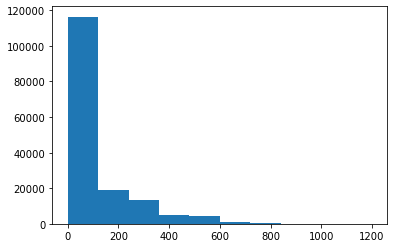

In [40]:
plt.hist(df['Age_new'])

##### Type

In [41]:
# only keep animal type dog and cat
df.Animal_Type.value_counts()

Dog          102095
Cat           51045
Other          6649
Bird            585
Livestock        19
Name: Animal_Type, dtype: int64

In [42]:
df=df[(df.Animal_Type=="Dog") | (df.Animal_Type=="Cat")]
df.Animal_Type.value_counts()

Dog    102095
Cat     51045
Name: Animal_Type, dtype: int64

##### Sex

In [43]:
df.Sex.value_counts()

Neutered Male    62230
Spayed Female    52654
Intact Male      17500
Intact Female    16401
Unknown           4355
Name: Sex, dtype: int64

In [44]:
check_type=list(map(lambda x: type(x)!=str, df["Sex"]))
df.Sex[check_type]='Unknown'
df['Neutered_Spayed']=[True if 'Neutered' in x or 'Spayed' in x else False
                       for x in df['Sex']]
df.Neutered_Spayed.value_counts()

True     114884
False     38256
Name: Neutered_Spayed, dtype: int64

In [45]:
df=df[df.Sex!='Unknown']
def m_f(sex):
    if 'Female' in sex:
        return 'Female'
    else:
        return 'Male'
df['Sex']=['Female' if 'Female' in x else 'Male'for x in df['Sex']]
df.Sex.value_counts()

Male      79730
Female    69055
Name: Sex, dtype: int64

##### Color

In [46]:
df['Color'].value_counts()

Black/White               16689
Black                     11049
Brown Tabby                6934
Brown/White                5894
Tan/White                  5569
                          ...  
Gray Tabby/Brown Tabby        1
Lynx Point/Tan                1
Black Smoke/Black             1
Blue Cream/Blue Tiger         1
White/Agouti                  1
Name: Color, Length: 553, dtype: int64

In [47]:
def set_order(color):
    if '/' in color:
        x=color.split('/')
        x.sort()
        first=x[0].split(' ')[0]
        second=x[1].split(' ')[0]
        if first==second:
            return first
        else:
            return first+'/'+ second
    else:
        return color.split(' ')[0]
df.Color=df.Color.apply(set_order)

In [48]:
df['Color'].value_counts()

Black/White       21702
Brown/White       18075
Brown             12342
Black             11809
Tan/White          8224
                  ...  
Cream/Tortie          1
Chocolate/Gold        1
Apricot/Tan           1
Seal/Tortie           1
Cream/Fawn            1
Name: Color, Length: 195, dtype: int64

In [49]:
unique_color=pd.DataFrame(df.Color.value_counts())
unique_color_lst=unique_color.index[unique_color.Color<30]

def unique_col(color):
    if color in unique_color_lst:
        return 'unique color'
    else:
        return color
df['Color_new']=df.Color.apply(unique_col)
df.Color_new.value_counts()

Black/White     21702
Brown/White     18075
Brown           12342
Black           11809
Tan/White        8224
                ...  
Black/Tortie       34
Brown/Fawn         33
Brown/Silver       32
Blue/Tortie        31
Blue/Gray          31
Name: Color_new, Length: 82, dtype: int64

### Mix

In [50]:
df['Mix']=[True if ('/' in x) or ('Mix' in x) 
           else False for x in df["Breed"]]

In [51]:
df['Mix'].value_counts()

True     127162
False     21623
Name: Mix, dtype: int64

##### Breed

In [52]:
df.Breed.value_counts()

Domestic Shorthair Mix                    31336
Pit Bull Mix                              14403
Labrador Retriever Mix                     9988
Chihuahua Shorthair Mix                    7711
Domestic Shorthair                         6810
                                          ...  
Dachshund Longhair/Rat Terrier                1
St. Bernard Rough Coat/German Shepherd        1
Cairn Terrier/Cardigan Welsh Corgi            1
Miniature Poodle/Jack Russell Terrier         1
Miniature Poodle/Italian Greyhound            1
Name: Breed, Length: 2418, dtype: int64

In [53]:
df.Breed=df.Breed.apply(set_order)
df.Breed.value_counts()

Domestic            44199
Pit                 16165
Labrador            11299
Chihuahua            9574
German               5829
                    ...  
Cavalier/Italian        1
Chinese/Rat             1
Cocker/Shetland         1
Collie/Jack             1
German/Wire             1
Name: Breed, Length: 1334, dtype: int64

In [54]:
unique_Breed=pd.DataFrame(df.Breed.value_counts())
unique_Breed_lst=unique_Breed.index[unique_Breed.Breed<30]

def unique_Breed(Breed):
    if Breed in unique_Breed_lst:
        return 'unique Breed'
    else:
        return Breed
df['Breed_new']=df.Breed.apply(unique_Breed)
df.Breed_new.value_counts()

Domestic               44199
Pit                    16165
Labrador               11299
Chihuahua               9574
German                  5829
                       ...  
Labrador/Queensland       31
Border/Dachshund          31
Golden/Great              31
Australian/Plott          31
Domestic/Siamese          30
Name: Breed_new, Length: 215, dtype: int64

### Outcome

In [55]:
df.Outcome_Type.value_counts()

Adoption           71625
Return to Owner    35810
Transfer           35325
Euthanasia          3699
Rto-Adopt           1326
Died                 835
Missing               86
Disposal              77
Relocate               2
Name: Outcome_Type, dtype: int64

In [56]:
df['Outcome']=df['Outcome_Type']
df['Outcome'][(df.Outcome_Type=="Adoption")#|(df.Outcome_Type=="Return to Owner")
              #|(df.Outcome_Type=="Rto-Adopt")
             ]='Adopted'

#df['Outcome'][(df.Outcome_Type=="Return to Owner")
#              |(df.Outcome_Type=="Rto-Adopt")]='Adopted'


df['Outcome'][(df.Outcome_Type=="Euthanasia")#|(df.Outcome_Type=="Died")|
              #(df.Outcome_Type=="Disposal")
             ]='Euthanasia'

<ipython-input-56-6679eb971eb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outcome'][(df.Outcome_Type=="Adoption")#|(df.Outcome_Type=="Return to Owner")
<ipython-input-56-6679eb971eb5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outcome'][(df.Outcome_Type=="Euthanasia")#|(df.Outcome_Type=="Died")|


In [57]:
df=df[(df.Outcome=="Adopted")|
      #(df.Outcome=="Return to Owner")|
       (df.Outcome=="Euthanasia")
     ]

In [58]:
df.Outcome.value_counts()

Adopted       71625
Euthanasia     3699
Name: Outcome, dtype: int64

In [59]:
df.Outcome[df.Outcome=='Adopted']=0
df.Outcome[df.Outcome=='Euthanasia']=1
#targe_y.Outcome[targe_y.Outcome=='Return to Owner']=2
df.Outcome=df.Outcome.astype('int')

<ipython-input-59-cc036ee4dd38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Outcome[df.Outcome=='Euthanasia']=1


### Save file for plot on Tableau/Model

In [61]:
df.to_csv("updated_dataframe.csv")